In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

2025-05-04 15:49:24.180649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746373764.397561      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746373764.462053      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Sensors model

In [ ]:

sensor_df = pd.read_csv("../dataset/Gas Sensors Measurements/Gas_Sensors_Measurements.csv")
sensor_df.head()

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
0,0,555,515,377,338,666,451,416,NoGas,0_NoGas
1,1,555,516,377,339,666,451,416,NoGas,1_NoGas
2,2,556,517,376,337,666,451,416,NoGas,2_NoGas
3,3,556,516,376,336,665,451,416,NoGas,3_NoGas
4,4,556,516,376,337,665,451,416,NoGas,4_NoGas


In [9]:
sensor_df.drop(columns=["Serial Number", "Corresponding Image Name"], inplace = True)
print(sensor_df.isnull().sum())

MQ2      0
MQ3      0
MQ5      0
MQ6      0
MQ7      0
MQ8      0
MQ135    0
Gas      0
dtype: int64


In [10]:
sensor_df["Gas"] = sensor_df["Gas"].astype("category").cat.codes
sensor_df.head()

,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas
0,555,515,377,338,666,451,416,1
1,555,516,377,339,666,451,416,1
2,556,517,376,337,666,451,416,1
3,556,516,376,336,665,451,416,1
4,556,516,376,337,665,451,416,1


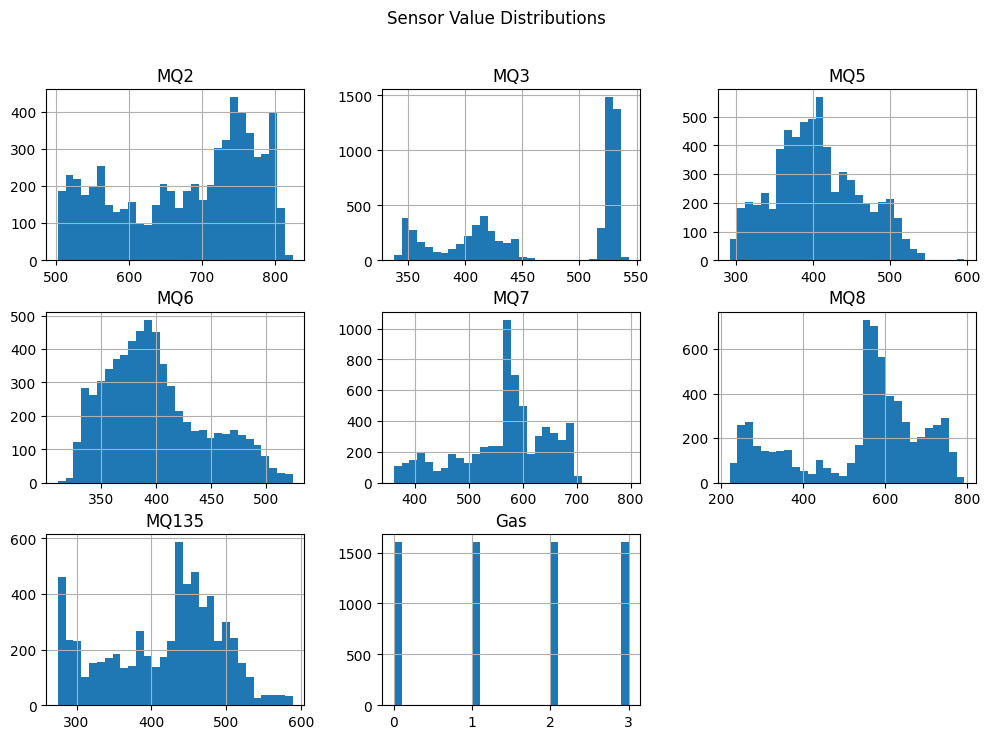

In [11]:

sensor_df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Sensor Value Distributions")
plt.show()

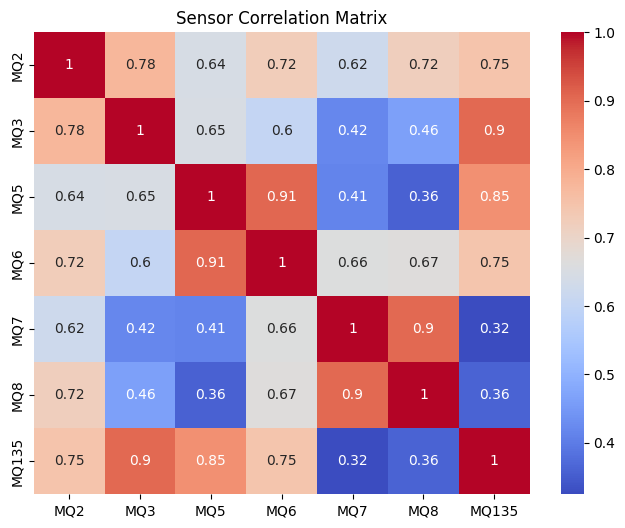

In [12]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(sensor_df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Sensor Correlation Matrix")
plt.show()


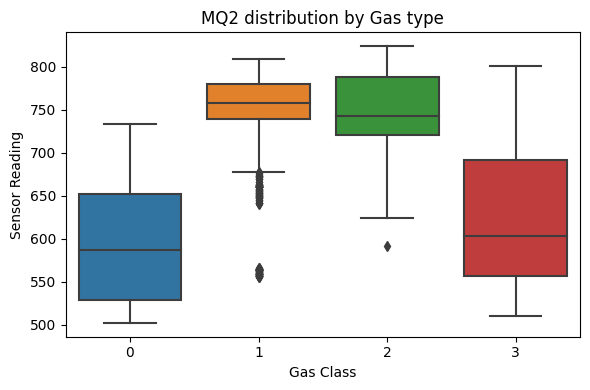

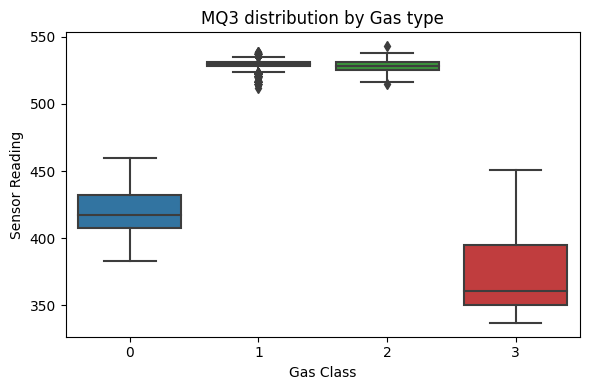

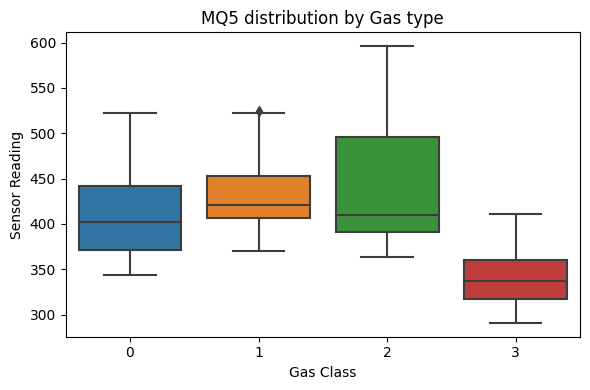

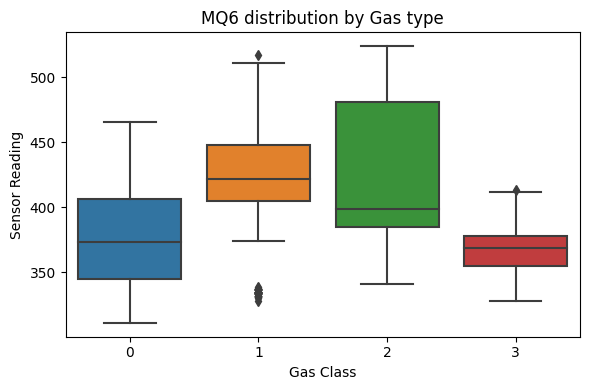

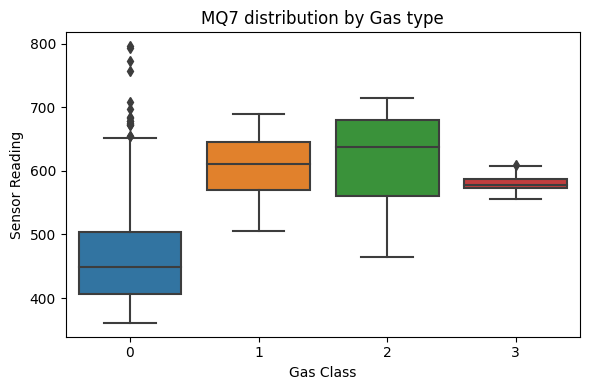

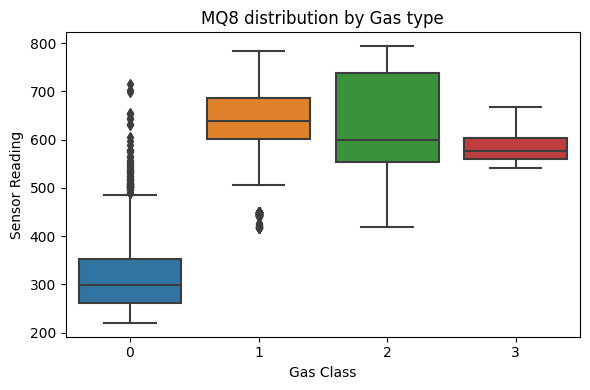

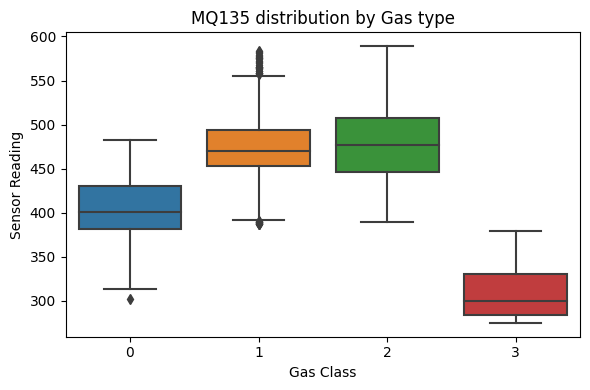

In [7]:
sensor_cols = ["MQ2", "MQ3", "MQ5", "MQ6", "MQ7", "MQ8", "MQ135"]

# Plot each sensor
for sensor in sensor_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Gas", y=sensor, data=sensor_df)
    plt.title(f"{sensor} distribution by Gas type")
    plt.ylabel("Sensor Reading")
    plt.xlabel("Gas Class")
    plt.tight_layout()
    plt.show()